  # Assignment 2 (Life Expectancy Prediction) 20L-2261

## 1.1 Data Description

In [1]:
%config IPCompleter.greedy=True
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import preprocessing, linear_model 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dat and not include unnamed first column
headers = list(pd.read_csv("train.csv", nrows =1))
train_data = pd.read_csv("train.csv", usecols=[c for c in headers if c != 'Unnamed: 0'])
test_data = pd.read_csv("test.csv")

In [3]:
# Dimensions of Training Data
train_data.shape

(362, 16)

In [4]:
# columns
train_data.columns

Index(['surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [5]:
# Data Description
train_data.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [6]:
# Check Dtypes
train_data.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [7]:
# First 5 rows of data (Head)
train_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


## 1.2 Data Wrangling and Preprocessing 

In [8]:
# Check for Null or missing values
train_data.isnull().values.any()

True

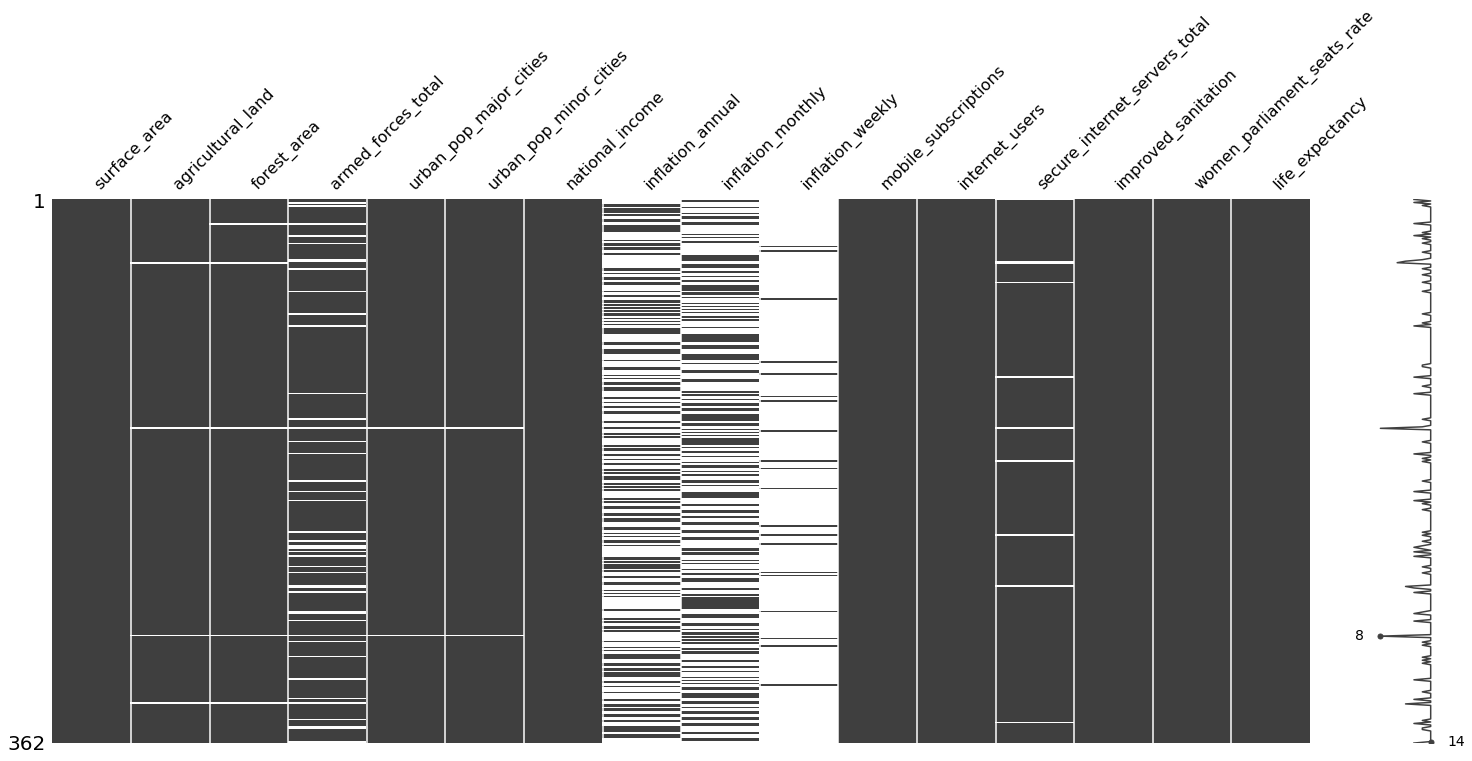

In [9]:
# plot missing vals
msno.matrix(train_data)

In [10]:
# Check for Null or missing values in each column (Number of missing values in each column)
train_data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [11]:
train_data['national_income'].unique() 

array(['unknown', 'very low', 'high', 'medium low', 'medium high', 'low',
       'very high'], dtype=object)

In [12]:
# Get Columns to encode. 
encoding_cols = [c for c in train_data.columns if train_data[c].dtype == 'object' and c != 'internet_users']
encoding_cols

['national_income',
 'mobile_subscriptions',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [13]:
# copy Training data
train_data_copy = train_data.copy()

In [14]:
# Before encoding columns
for c in encoding_cols:
    print(train_data[c].unique())

['unknown' 'very low' 'high' 'medium low' 'medium high' 'low' 'very high']
['less than 1 per person' 'more than 1 per person'
 'more than 2 per person' 'unknown' 'more than 3 per person']
['high access' 'low access' 'no info' 'very high access' 'medium access'
 'very low access']
['[0%-25%)' 'unknown' '[25%-50%)' '[50%-75%)']


In [15]:
# Encode Columns / Change data types of columns form object to category
label_encoder = preprocessing.LabelEncoder() 
for c in encoding_cols:
    train_data_copy[c]= label_encoder.fit_transform(train_data_copy[c]) 

In [16]:
# Compare Actual and Encoded labels
for c in encoding_cols:
    print('column Name: ', c)
    print('Actual Label: ', train_data[c].unique().tolist())
    print('Encoding Label: ', train_data_copy[c].unique().tolist())
    print('----------------------')

column Name:  national_income
Actual Label:  ['unknown', 'very low', 'high', 'medium low', 'medium high', 'low', 'very high']
Encoding Label:  [4, 6, 0, 3, 2, 1, 5]
----------------------
column Name:  mobile_subscriptions
Actual Label:  ['less than 1 per person', 'more than 1 per person', 'more than 2 per person', 'unknown', 'more than 3 per person']
Encoding Label:  [0, 1, 2, 4, 3]
----------------------
column Name:  improved_sanitation
Actual Label:  ['high access', 'low access', 'no info', 'very high access', 'medium access', 'very low access']
Encoding Label:  [0, 1, 3, 4, 2, 5]
----------------------
column Name:  women_parliament_seats_rate
Actual Label:  ['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']
Encoding Label:  [0, 3, 1, 2]
----------------------


In [17]:
# Check Missing Values in Each Column
train_data_copy.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

#### Missing Values Observation
 1- We can drop `inflation_monthly` and `inflation_weekly` columns becasue we have `inflation_annual` column which is derived attribute. so we can only keep `inflation_annual` form these three columns.

In [18]:
# Drop inflation_weekly and inflation_monthly column
train_data_copy.drop(columns=['inflation_weekly', 'inflation_monthly'], axis=1, inplace=True)
train_data_copy

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,4,NaN,0,0 per 1000 people,NaN,0,0,69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,6,NaN,0,154 per 1000 people,2.623624e+06,1,0,59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,4,NaN,1,90 per 100 people,1.656589e+09,3,3,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,0,1.374906,1,76 per 100 people,6.625072e+08,4,1,81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,4,-0.044229,1,350 per 1000 people,2.832808e+07,4,1,73.193561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,243610.0,1.736999e+07,3.131596e+06,159150.0,42.818424,39.273576,0,2.554547,1,90 per 100 people,1.193275e+09,4,0,80.956098
358,9831510.0,4.357576e+08,3.326943e+08,1433150.0,22.948363,58.328637,5,1.464833,0,84 per 100 people,1.304449e+09,4,0,78.841463
359,176220.0,1.446148e+07,1.811858e+06,25450.0,92.409069,2.573931,2,NaN,1,58 per 100 people,7.511805e+07,4,0,76.836195
360,330972.0,1.160670e+07,1.549346e+07,522000.0,27.411815,4.897185,1,NaN,1,44 per 100 people,8.159726e+06,2,0,75.756488


In [19]:
train_data_copy.columns
train_data_copy.shape

(362, 14)

In [20]:
train_data_copy['internet_users'].head(10)

0      0 per 1000 people
1    154 per 1000 people
2      90 per 100 people
3      76 per 100 people
4    350 per 1000 people
5      45 per 100 people
6      64 per 100 people
7      81 per 100 people
8      82 per 100 people
9      72 per 100 people
Name: internet_users, dtype: object

#### Internet User Column Observation
Values in this column are inconsistent: sometimes it take `x per 1000 people` and sometimes it take `x per 100 people`. we need to make it consistent and there are two ways to it: 1 => Divide per 1000 people value by 10 2=> Multiply per 100 people value by 10. I will use second approach.

In [21]:
# Repalace unknown value with Nan in internet_users column
train_data_copy['internet_users'].replace(to_replace='unknown', value=np.nan, inplace=True)

In [22]:
# Replace values of internet_users column to single integar value from x per 1000 People => x
train_data_copy.loc[train_data_copy['internet_users'].str.split(' ').str[2] == '1000', 
               'internet_users'] = train_data_copy['internet_users'].str.split(' ').str[0].astype(float)

In [23]:
# Replace values of internet_users column to single integar value from x per 100 People => x and then multiply with 10 make column data consisten
train_data_copy.loc[train_data_copy['internet_users'].str.split(' ').str[2] == '100', 
               'internet_users'] = train_data_copy['internet_users'].str.split(' ').str[0].astype(float) * 10

In [24]:
train_data_copy['internet_users'] = train_data_copy['internet_users'].astype(float) 

In [25]:
train_data_copy.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                    int32
inflation_annual                 float64
mobile_subscriptions               int32
internet_users                   float64
secure_internet_servers_total    float64
improved_sanitation                int32
women_parliament_seats_rate        int32
life_expectancy                  float64
dtype: object

In [26]:
train_data_copy.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
mobile_subscriptions               0
internet_users                     6
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [27]:
# impute missing values in numeric columns except inflation annual using median
missing_value_cols = [c for c in train_data_copy.columns if train_data_copy[c].isnull().values.any() and c != 'inflation_annual']
for c in missing_value_cols:
    train_data_copy[c].fillna(train_data_copy[c].median(), inplace=True)

In [28]:
train_data_copy.isnull().sum()

surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                 0
urban_pop_major_cities             0
urban_pop_minor_cities             0
national_income                    0
inflation_annual                 216
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total      0
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

##### Missing Column Observation (Inflation_annual)
There is only one column left with missing values whic is inflation_annual we will fill its values using regression

In [29]:
#Impute missing values in inflation_annual column using regression
# ready data for the regression
X = train_data_copy[train_data_copy['inflation_annual'].notnull()].drop(columns=['inflation_annual'])
Y = train_data_copy.loc[train_data_copy['inflation_annual'].notnull(), 'inflation_annual']

In [30]:
# Train model using regression
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [31]:
# Print Coeff and intercept
print(reg.coef_)
print(reg.intercept_)

[-6.35760624e-08  1.19939366e-09  1.50191083e-10  1.31147484e-07
  9.72255622e-03  5.55168869e-03 -3.92941995e-02 -6.78264350e-02
 -8.25883035e-04  8.05096230e-11 -7.46807145e-02 -9.69149715e-02
  1.42361291e-02]
0.9408922453693297


In [32]:
# Fill the missing values in inflation_Annual column
missing_values = train_data_copy[train_data_copy['inflation_annual'].isnull()].drop(columns=['inflation_annual'])
train_data_copy.loc[train_data_copy['inflation_annual'].isnull(), 'inflation_annual'] = reg.predict(missing_values)

In [33]:
train_data_copy.isnull().sum()

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

## 1.3 Data Analysis and Visualization

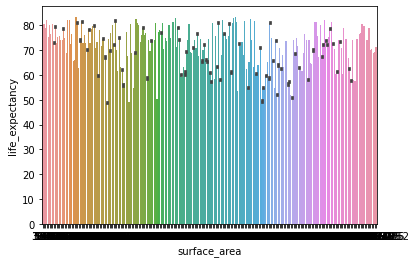

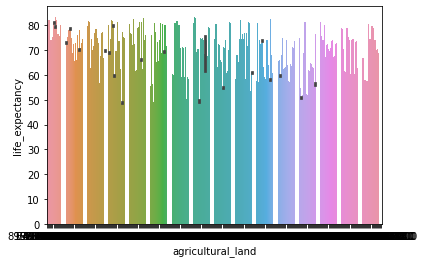

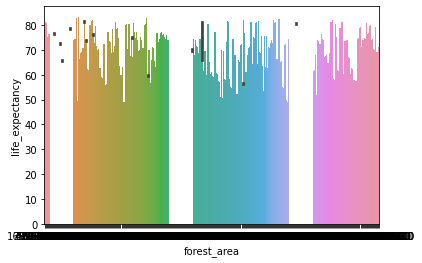

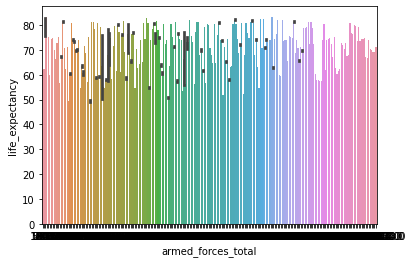

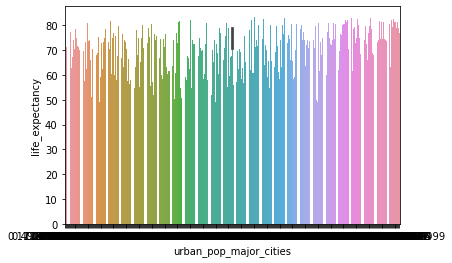

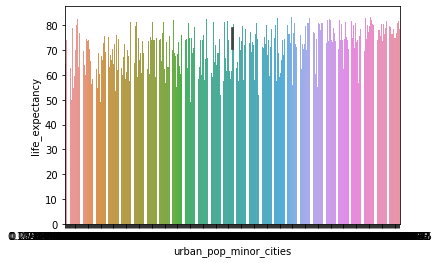

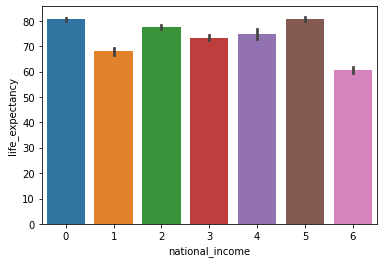

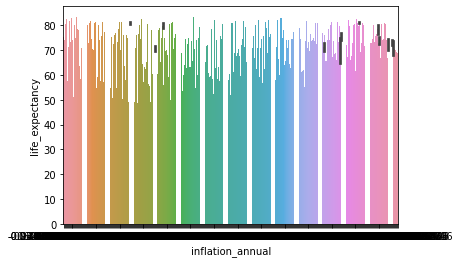

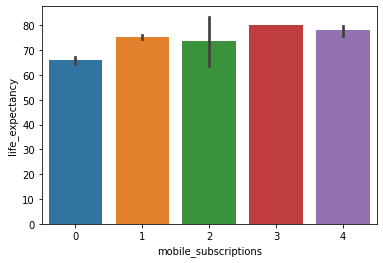

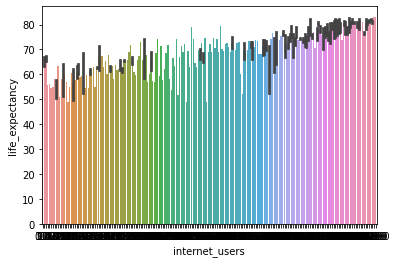

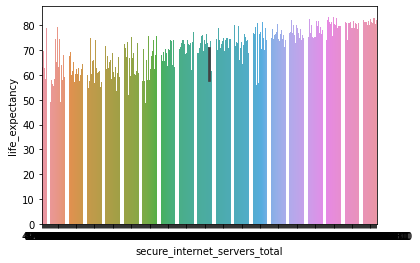

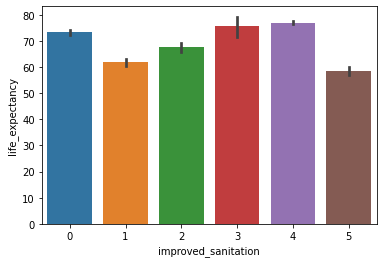

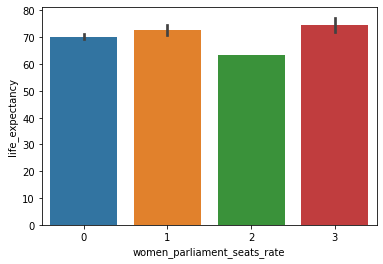

In [34]:
# Bar Plots
for i, c in enumerate(train_data_copy.columns):
    if c != "life_expectancy":
        plt.figure(i)
        sns.barplot(x=c, y="life_expectancy", data=train_data_copy) 

<Figure size 432x288 with 0 Axes>

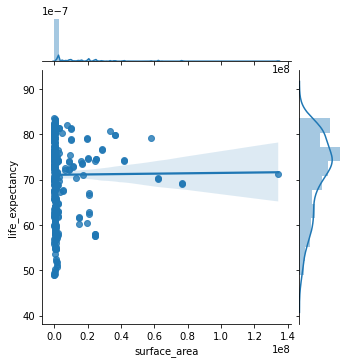

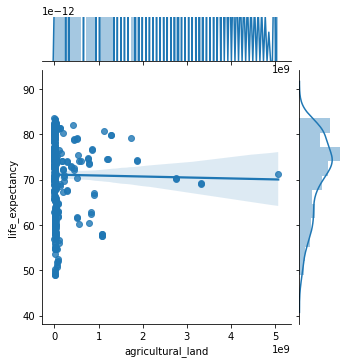

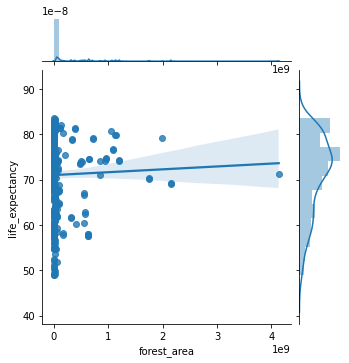

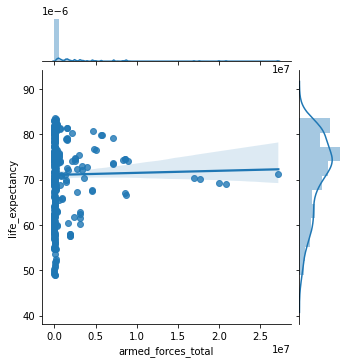

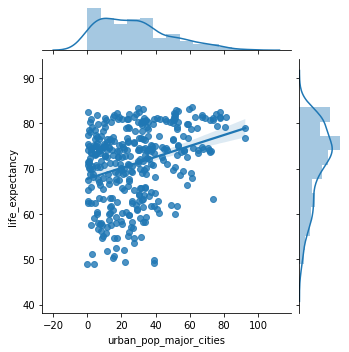

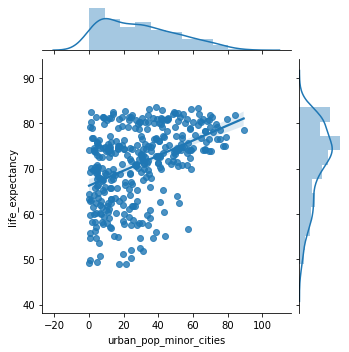

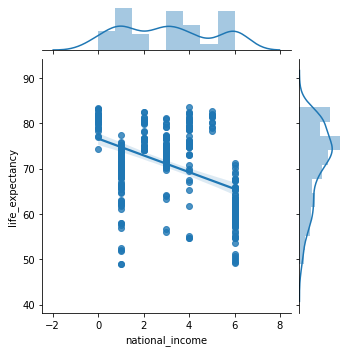

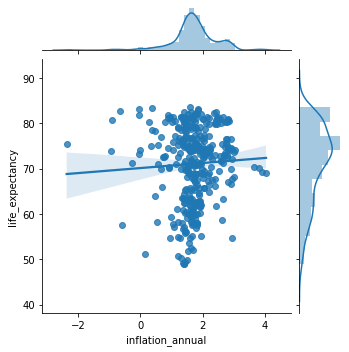

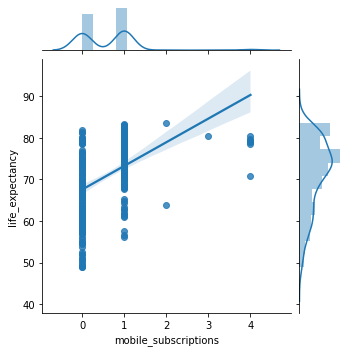

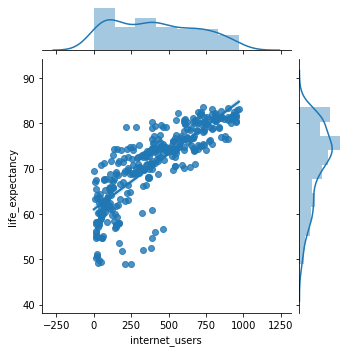

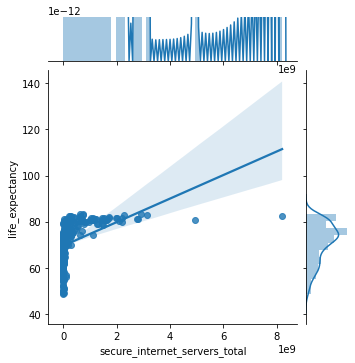

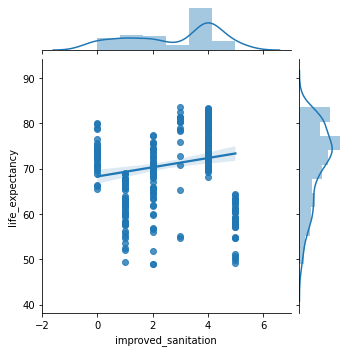

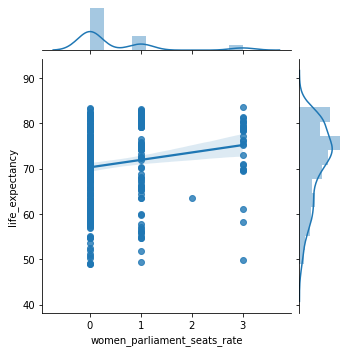

In [35]:
# Joint Plots
for i, c in enumerate(train_data_copy.columns):
    if c != "life_expectancy":
        plt.figure(i)
        sns.jointplot(x=c, y="life_expectancy", data=train_data_copy, kind='reg', height=5)

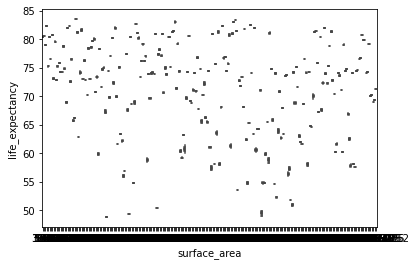

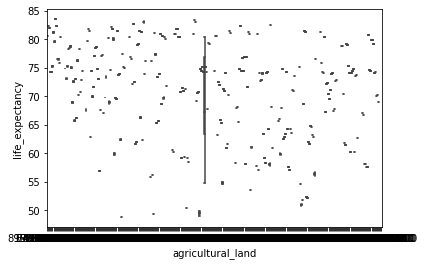

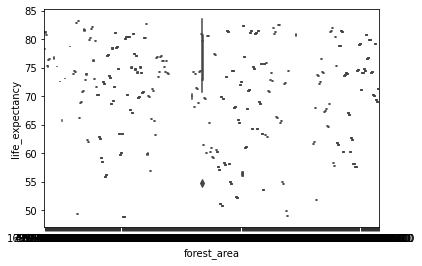

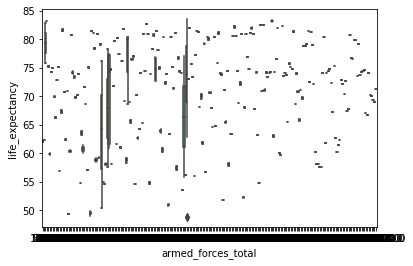

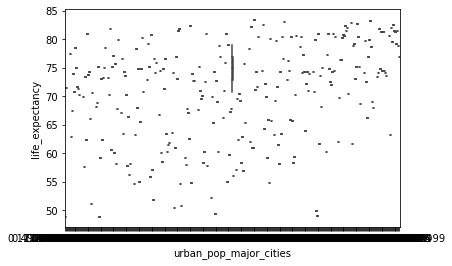

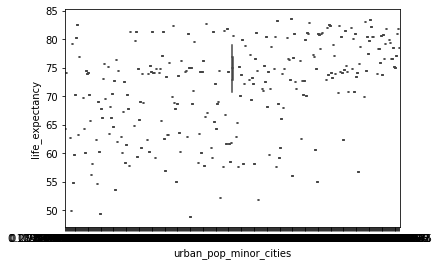

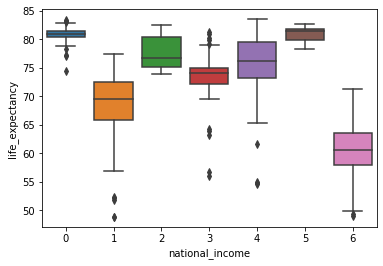

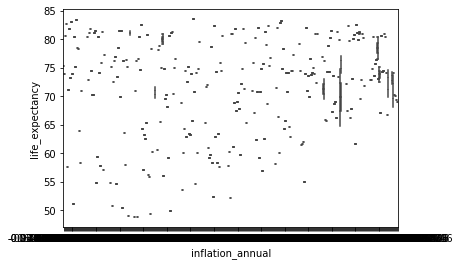

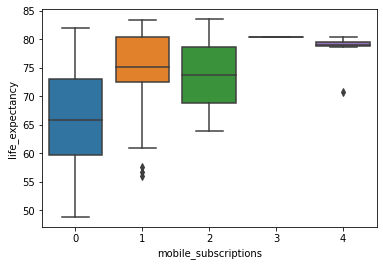

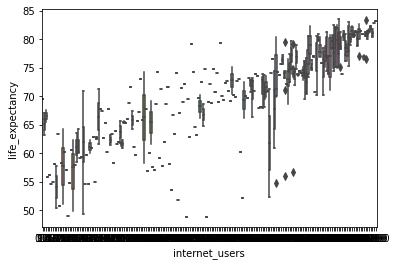

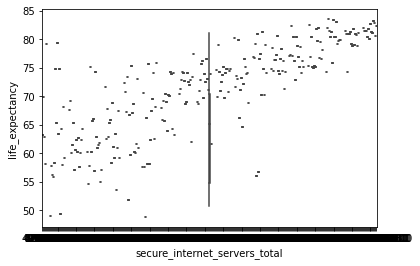

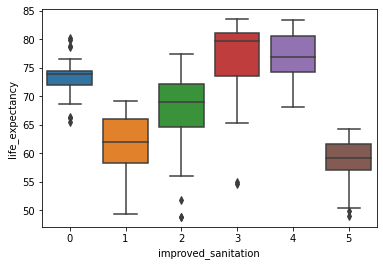

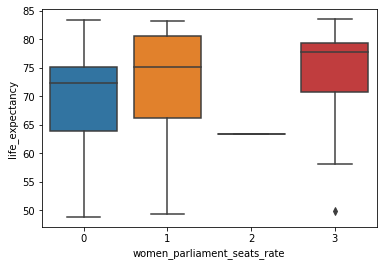

In [36]:
# Box Plots
for i, c in enumerate(train_data_copy.columns):
    if c != "life_expectancy":
        plt.figure(i)
        sns.boxplot(x=c, y="life_expectancy", data=train_data_copy)

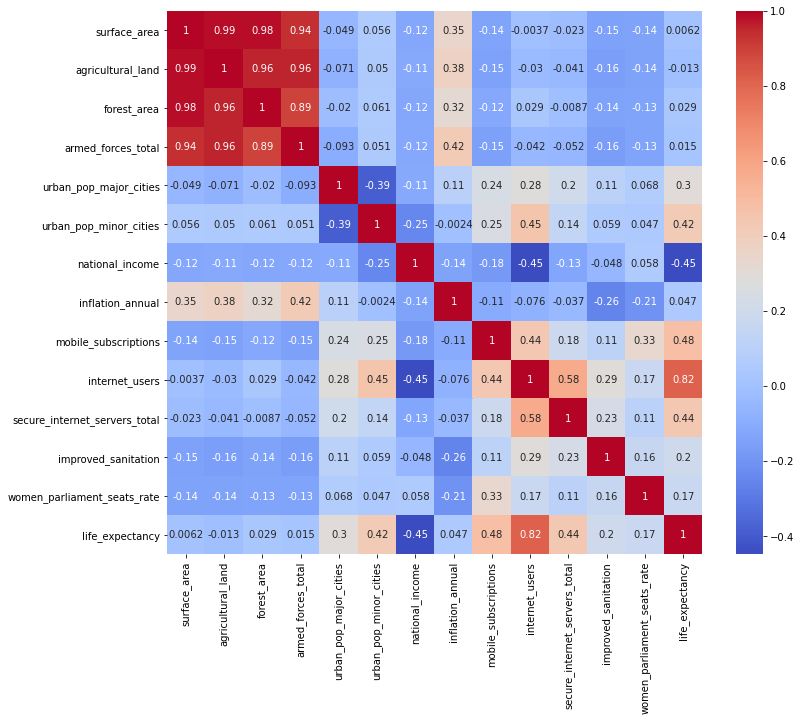

In [37]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data_copy.corr(), cmap='coolwarm', annot=True)   

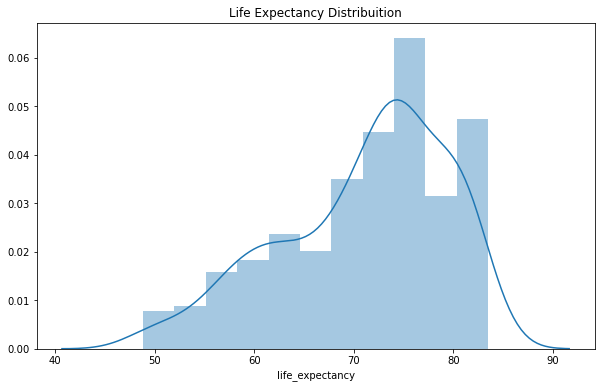

In [38]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize = (10, 6))
plt.title('Life Expectancy Distribuition')
sns.distplot(train_data_copy['life_expectancy'])
plt.show()

## 1.4 Feature Selection

In [41]:
corr =train_data_copy.corr()
corr[abs(corr['life_expectancy']) > 0.1]['life_expectancy']

urban_pop_major_cities           0.297620
urban_pop_minor_cities           0.422193
national_income                 -0.448748
mobile_subscriptions             0.481065
internet_users                   0.817312
secure_internet_servers_total    0.437312
improved_sanitation              0.199058
women_parliament_seats_rate      0.170411
life_expectancy                  1.000000
Name: life_expectancy, dtype: float64

#### Features Observation
The features `urban_pop_major_cities`, `urban_pop_minor_cities`, `mobile_subscriptions`, `internet_users`, `secure_internet_servers_total`, `improved_sanitation` and `women_parliament_seats_rate` have significant correlation with `DEATH_EVENT`so we will use these features.

In [59]:
# Data data will only contains columns on which we will train our model and they are most useful features
dataset=train_data_copy[['urban_pop_major_cities', 'urban_pop_minor_cities', 'national_income', 
              'mobile_subscriptions', 'internet_users', 'secure_internet_servers_total', 
              'improved_sanitation', 'women_parliament_seats_rate', 'life_expectancy']]
dataset.shape

(362, 9)

## 1.5 Model Training

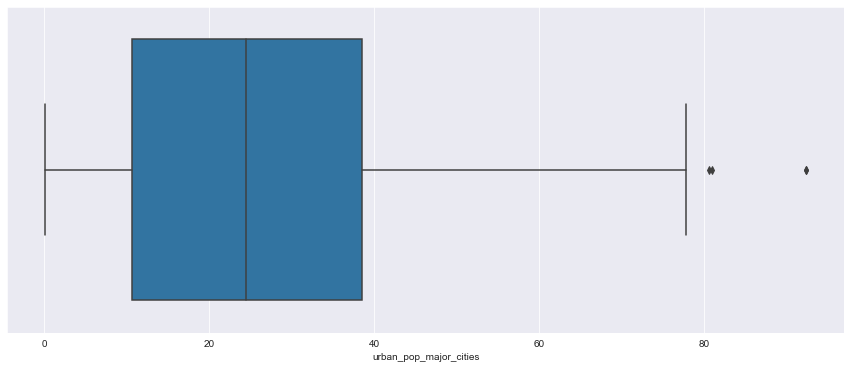

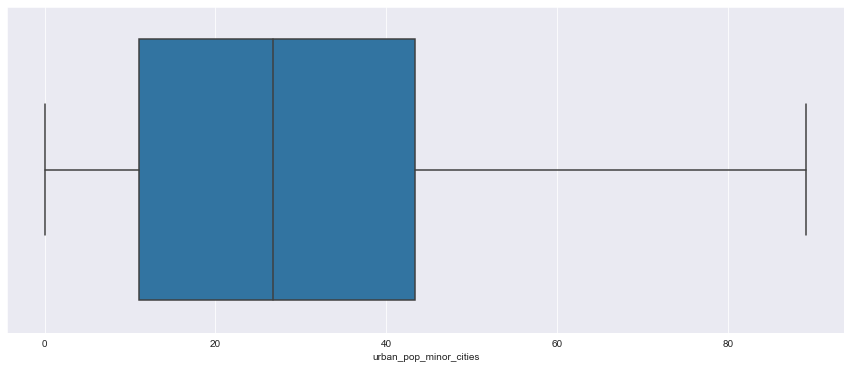

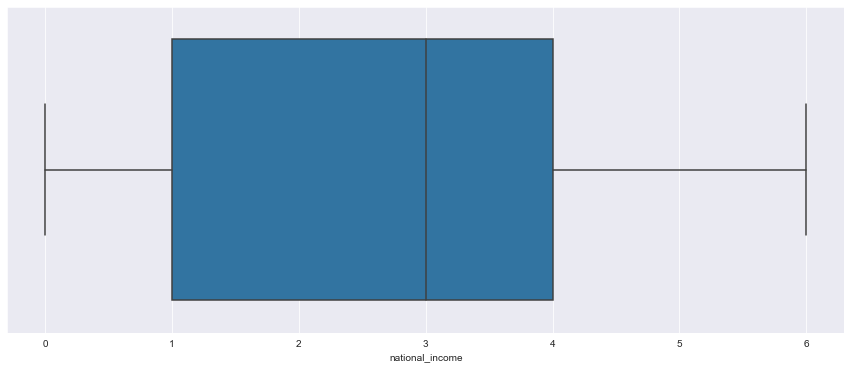

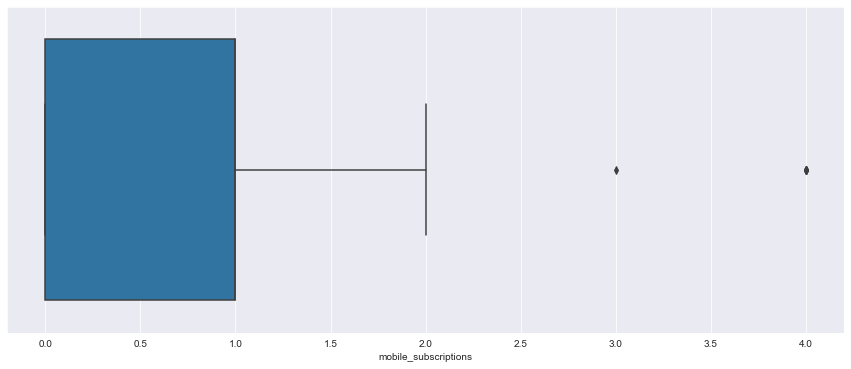

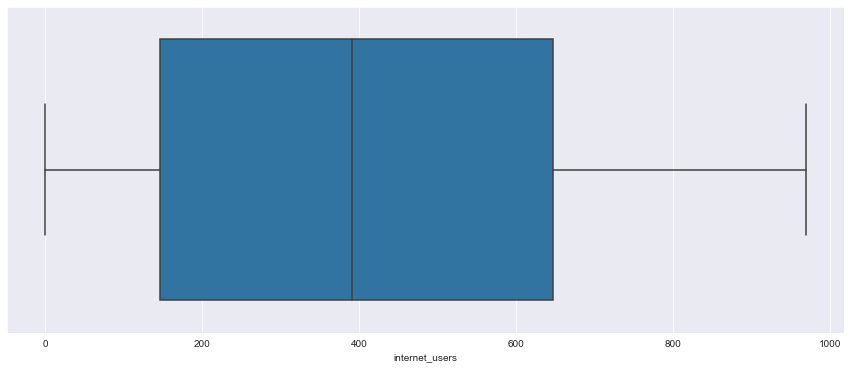

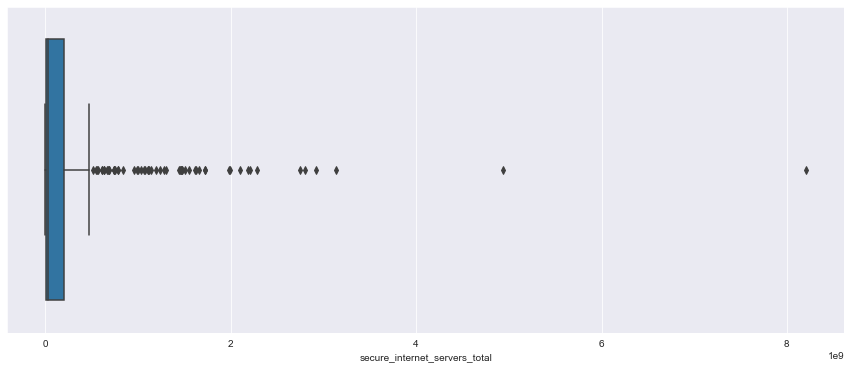

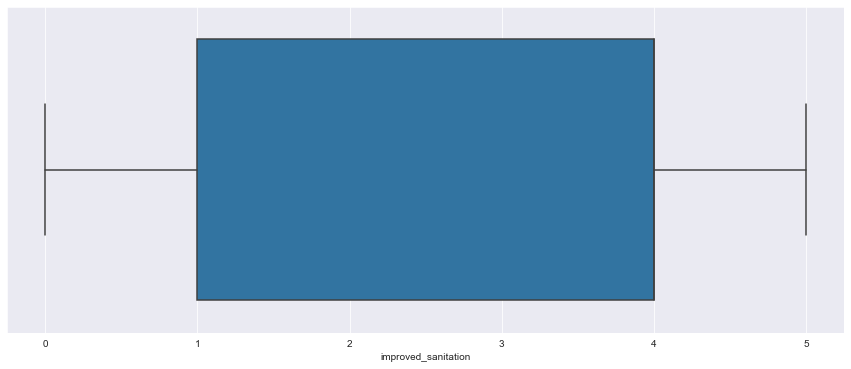

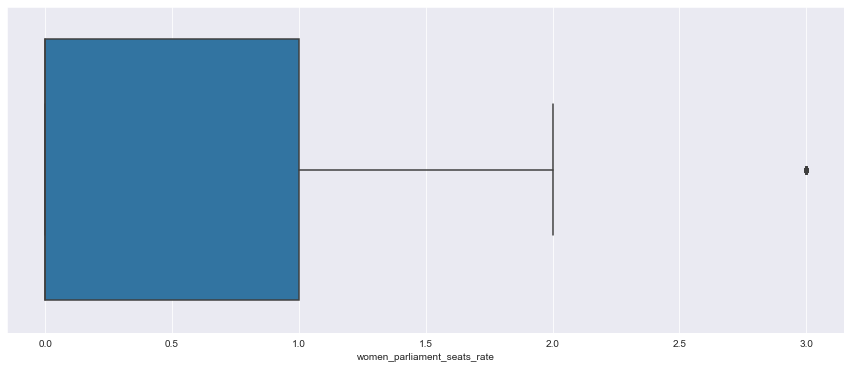

In [60]:
# Detect Outliers in our selected features
for i, c in enumerate(dataset.columns):
    if c != 'life_expectancy':
        plt.figure(i)
        sns.boxplot(x=c, data=dataset)

In [61]:
# Handle outliers
dataset = dataset[dataset['urban_pop_major_cities']<80]
dataset = dataset[dataset['women_parliament_seats_rate']<2.9]

In [71]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data, 
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them 
columns = [c for c in dataset.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(dataset[columns])
dataset[columns] = scaler.transform(dataset[columns])

In [72]:
# Split train and test data
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['life_expectancy'])
y = dataset['life_expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
print("Training Set Dimensions:", x_train.shape)
print("Validation Set Dimensions:", x_test.shape)

Training Set Dimensions: (263, 8)
Validation Set Dimensions: (66, 8)


#### Train Models

In [81]:
# Multiple Linear Regression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [82]:
# Measure mean absolute error for training and validation sets for Multiple Linear Regression
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, lr.predict(x_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, lr.predict(x_test)))

Mean Absolute Error for Training Set: 3.427551769048346
Mean Absolute Error for Test Set: 3.313319047534224


In [93]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

randomf = RandomForestRegressor(max_depth= 10,max_features= 2,min_samples_leaf=3,min_samples_split= 8,n_estimators= 200)
randomf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=2, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [94]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(x_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(x_test)))

Mean Absolute Error for Training Set: 2.2051335812146444
Mean Absolute Error for Test Set: 2.932590987688697


#### Evaluate Important Features

feature: urban_pop_major_cities = 0.06118544292262449
feature: urban_pop_minor_cities = 0.08255446794829416
feature: national_income = 0.1396353112082552
feature: mobile_subscriptions = 0.060506164825109426
feature: internet_users = 0.322810885986274
feature: secure_internet_servers_total = 0.23650288364571462
feature: improved_sanitation = 0.08971137122537037
feature: women_parliament_seats_rate = 0.007093472238357703


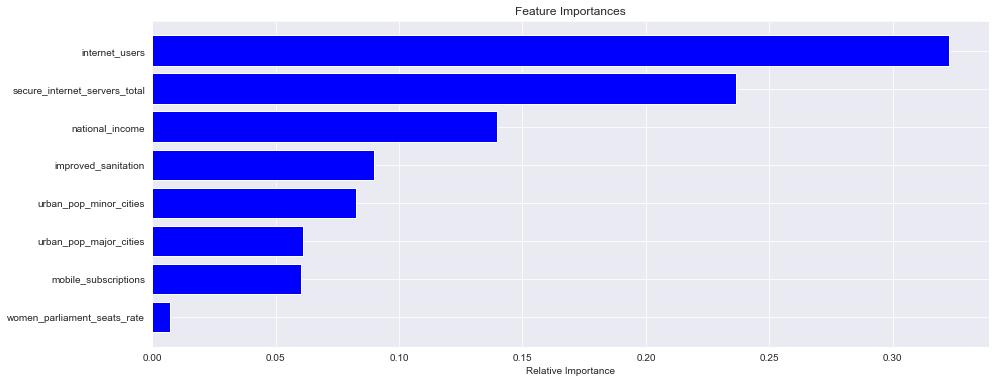

In [95]:
# important features for random forest regressor
for name, importance in zip(x.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = x.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Important Feature Observation
`internet_users` and `secure_internet_servers_total` are the two most important features.

### 1.6 Testing and Optimization

In [96]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6], 
          'min_samples_leaf': [3, 4, 5], 
          'min_samples_split': [8, 10, 12], 
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [97]:
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(x_train)
predict_test = best_model.predict(x_test)

# print mean absolute error for predictions taken from the best model 
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))
print('Best Params for random forest :', rf_grid.best_params_)

Mean Absolute Error for Training Set: 2.199796302630982
Mean Absolute Error for Validation Set: 2.9350507888872084
Best Params for random forest : {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
